### IMPORTING LIBRARIES

In [38]:
# Import Required Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### DATA LOADING

In [39]:
# Load the Dataset
data = pd.read_csv('netflix_data.csv')

### DATA EXPLORATION 

In [40]:
data.head(2)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [41]:
# concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [42]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [43]:
# checking the dimensionality of dataframe
data.shape

(8790, 10)

In [44]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [45]:
data.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

### DATA CLEANING

In [46]:
data.isnull().sum()   # checking for null values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [47]:
data.dropna()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [48]:
data.drop_duplicates(inplace=True)

In [49]:
data['date_added'] = pd.to_datetime(data['date_added'])   # change type of 'date_added'

### DATA ANALYSIS

In [50]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [51]:
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [52]:
release_years = data['release_year'].value_counts()
release_years

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64

In [53]:
content_type = data['type'].value_counts()
content_type

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [54]:
ratings = data['rating'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [55]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by = 'count', ascending = False)[:10]
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


In [56]:
data['month'] = data['date_added'].dt.month
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
print(monthly_movie_release)

month
1     545
2     382
3     528
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: count, dtype: int64


In [57]:
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
monthly_series_release

month
1     192
2     180
3     213
4     214
5     193
6     236
7     262
8     236
9     251
10    215
11    207
12    265
Name: count, dtype: int64

In [58]:
data['year'] = data['date_added'].dt.year
yearly_movie_release=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_movie_release

year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64

In [59]:
yearly_series_release=data[data['type']=='TV Show']['year'].value_counts().sort_index()
yearly_series_release

year
2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: count, dtype: int64

In [60]:
top_ten_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
top_ten_movie_genre

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
dtype: int64

In [61]:
top_ten_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
top_ten_series_genre

listed_in
Kids' TV                                                  219
International TV Shows, TV Dramas                         121
Crime TV Shows, International TV Shows, TV Dramas         110
Kids' TV, TV Comedies                                      97
Reality TV                                                 95
International TV Shows, Romantic TV Shows, TV Comedies     94
International TV Shows, Romantic TV Shows, TV Dramas       90
Anime Series, International TV Shows                       87
Docuseries                                                 84
TV Comedies                                                68
dtype: int64

In [62]:
top_directors=data['director'].value_counts().sort_values(ascending=False)[1:11]
top_directors

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: count, dtype: int64

In [63]:
movies = data[data['type'] == 'Movie']
# Extract the duration in minutes as integers
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

C:\Users\nishu\AppData\Local\Temp\ipykernel_28748\10006868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)


In [64]:
tv_shows = data[data['type'] == 'TV Show']

# Number of seasons
tv_shows['seasons'] = tv_shows['duration']

# Count occurrences of each season count
season_counts = tv_shows['seasons'].value_counts().sort_values(ascending=False)

C:\Users\nishu\AppData\Local\Temp\ipykernel_28748\2322230317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration']


### DATA VISUALIZATION

#### 1. Content Type Distribution

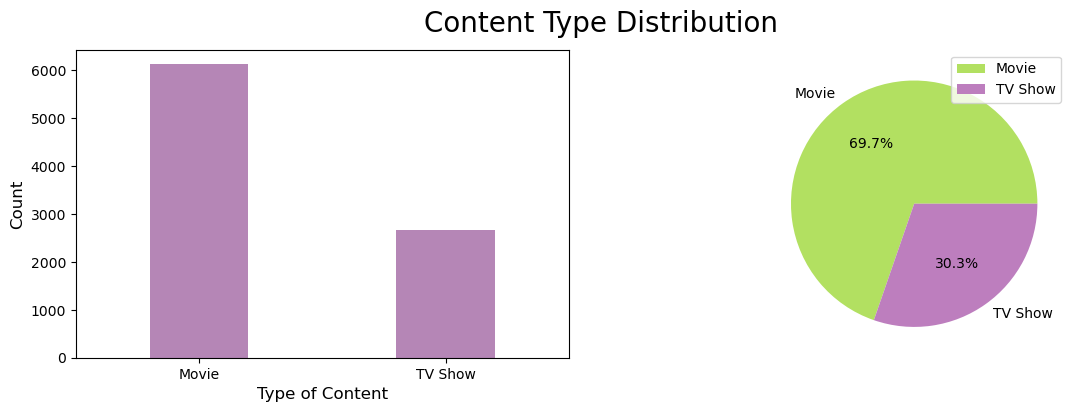

In [78]:
plt.figure(figsize = (14,4))
plt.suptitle('Content Type Distribution', fontsize=20)

plt.subplot(1,2,1)
sns.countplot(data = data, x = 'type', color = '#bd7ebe', width=0.4)
plt.xlabel('Type of Content', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1,2,2)
plt.pie(content_type, labels=['Movie', 'TV Show'], colors = ['#b2e061', '#bd7ebe'], autopct = '%0.1f%%', textprops = {'fontsize':10} )
plt.legend(loc=1)

plt.show()

#### 2. Ratings Distribution

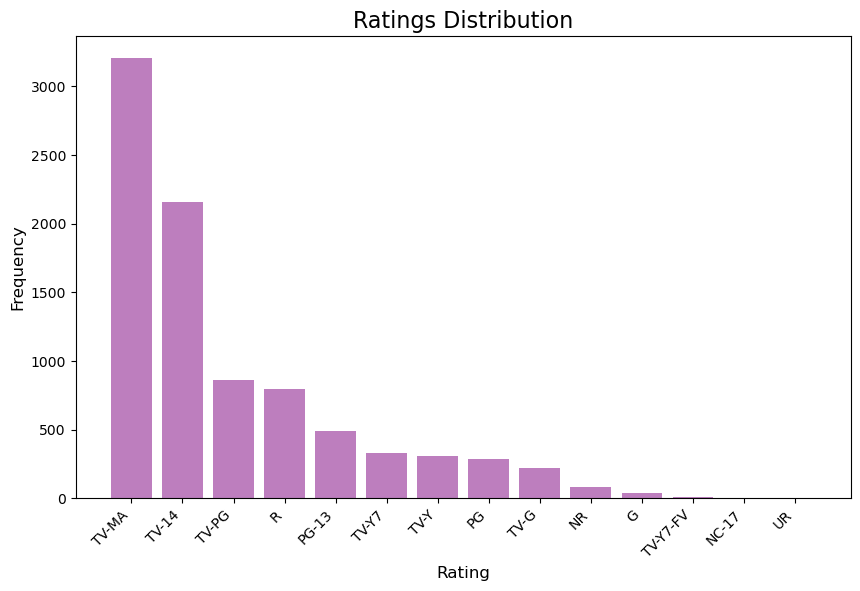

In [79]:
plt.figure(figsize = (10,6))
plt.title('Ratings Distribution', fontsize = 16)

plt.bar(ratings['rating'], ratings['count'], color = '#bd7ebe')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

#### 3. Top 10 Countries by Content

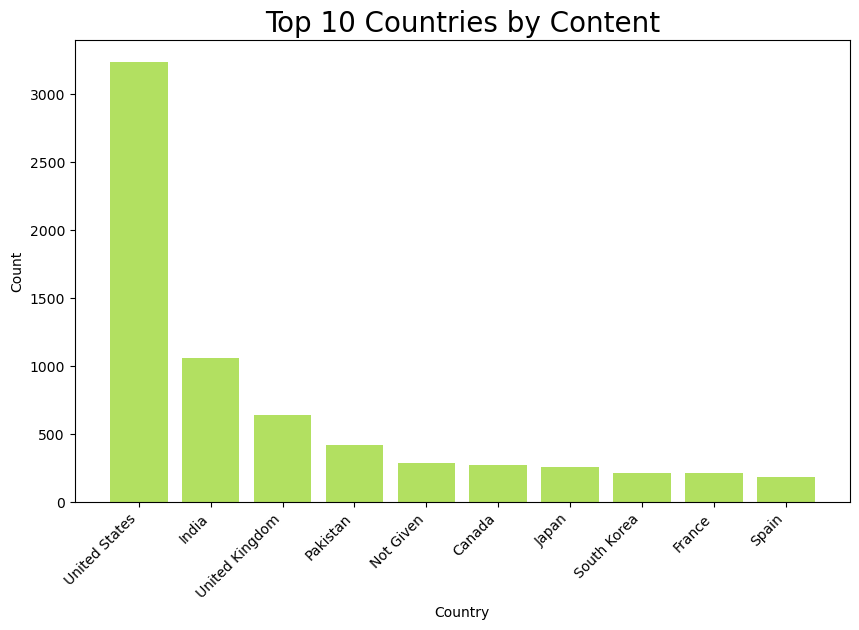

In [80]:
plt.figure(figsize = (10,6))
plt.title('Top 10 Countries by Content', fontsize = 20)

plt.bar(top_ten_countries['country'], top_ten_countries['count'], color='#b2e061')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()

#### 4. Monthly Release Trends

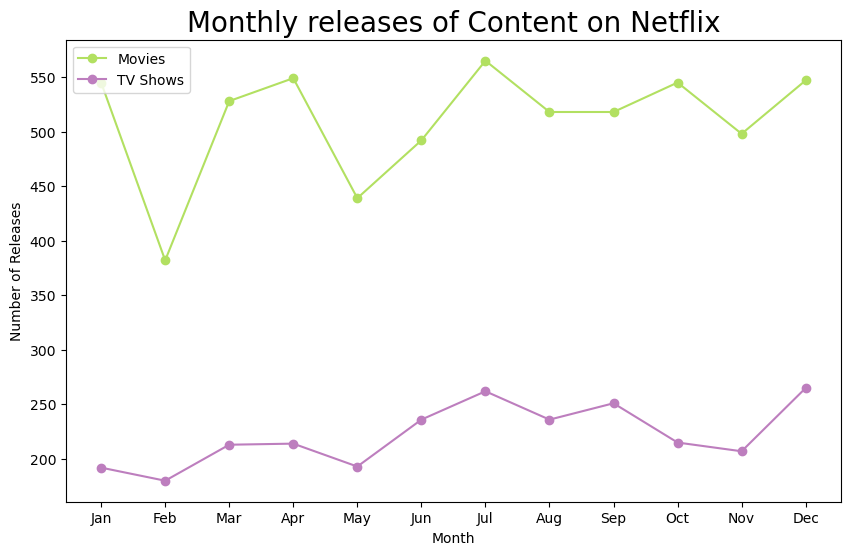

In [81]:
plt.figure(figsize=(10,6))
plt.title("Monthly releases of Content on Netflix", fontsize = 20)

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', color = '#b2e061', marker = 'o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='TV Shows', color = '#bd7ebe', marker = 'o')

plt.xlabel('Month', fontsize = 10)
plt.ylabel('Number of Releases', fontsize = 10)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc=2)

plt.show()

#### 5. Yearly Release Trends

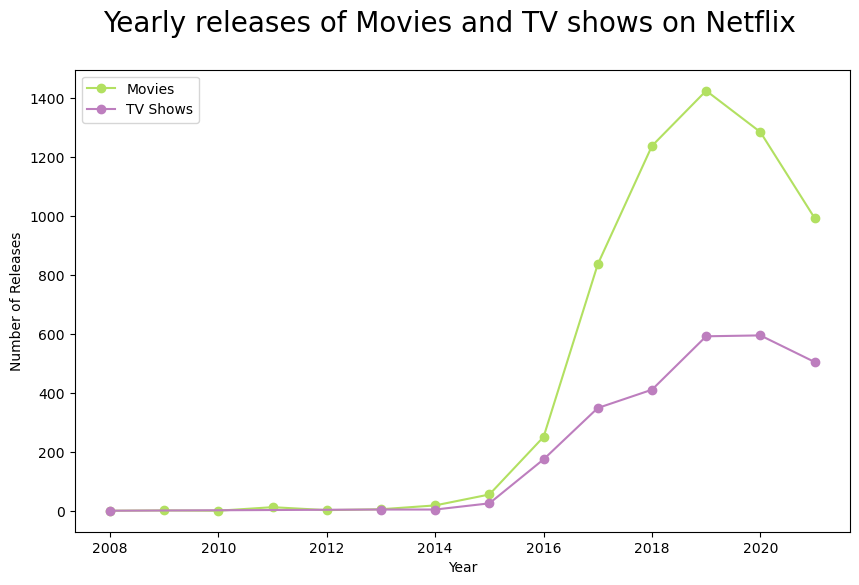

In [82]:
plt.figure(figsize=(10,6))
plt.suptitle("Yearly releases of Movies and TV shows on Netflix", fontsize = 20)

plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies', color = '#b2e061', marker = 'o')
plt.plot(yearly_series_release.index, yearly_series_release.values, label='TV Shows', color = '#bd7ebe', marker = 'o')

plt.xlabel('Year', fontsize = 10)
plt.ylabel('Number of Releases', fontsize = 10)

plt.legend(loc = 2)
plt.show()

#### 6. Top 10 Movie Genres

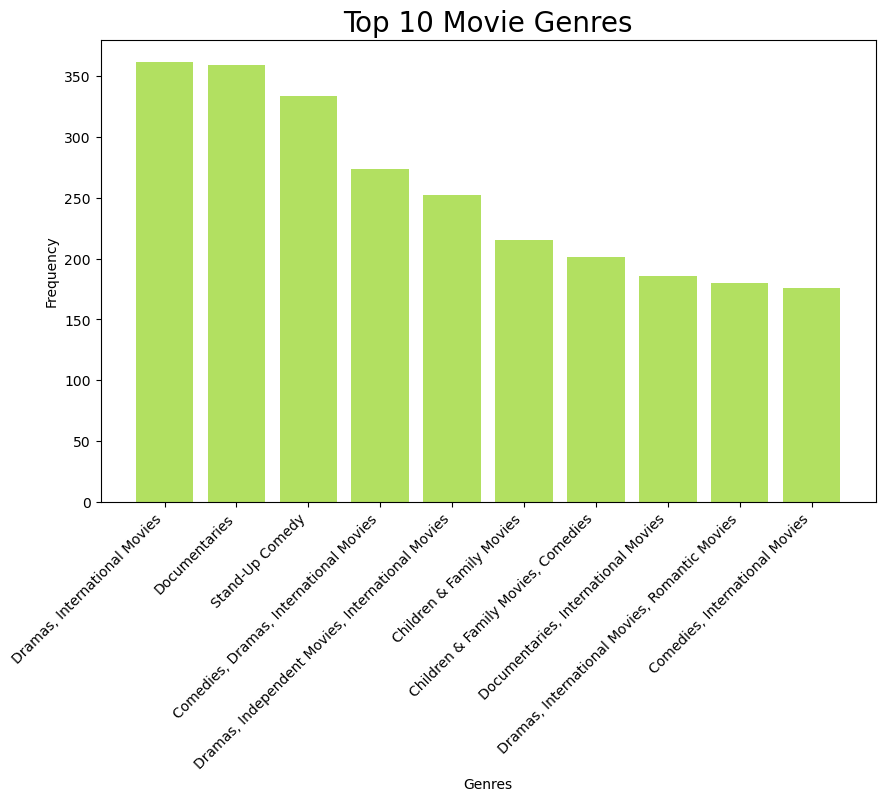

In [83]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Movie Genres', fontsize = 20)

plt.bar(top_ten_movie_genre.index, top_ten_movie_genre.values, color = '#b2e061')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")

plt.show()

####  7. Top 10 TV Show Genres

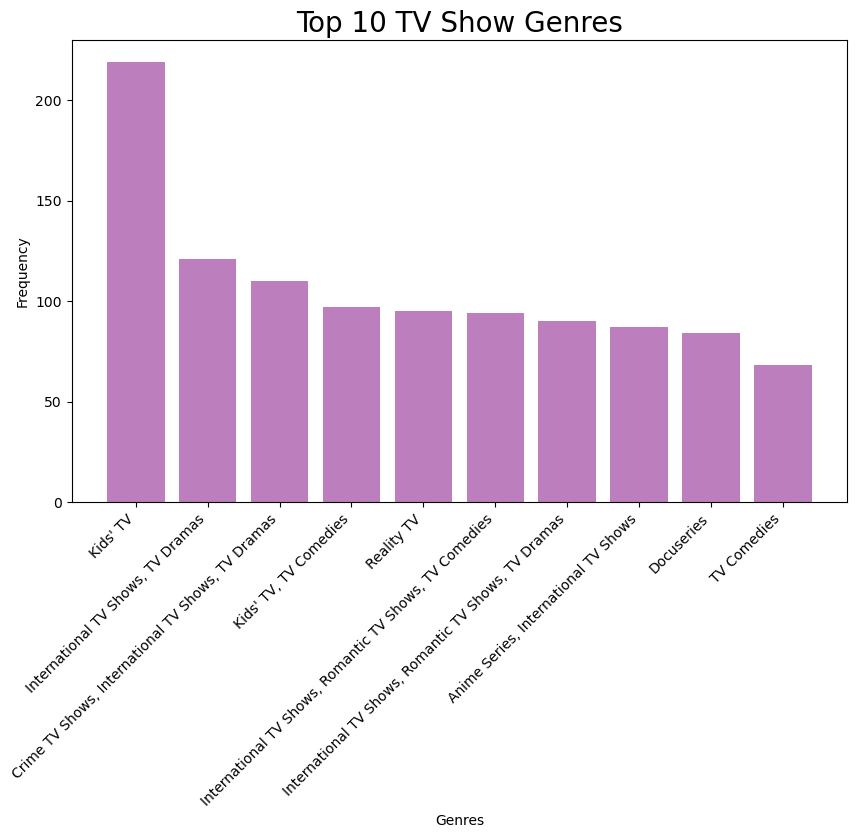

In [84]:
plt.figure(figsize=(10,6))
plt.title('Top 10 TV Show Genres', fontsize = 20)

plt.bar(top_ten_series_genre.index, top_ten_series_genre.values, color = '#bd7ebe')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Frequency")

plt.show()

#### 8. Top 10 Directors with Most Content

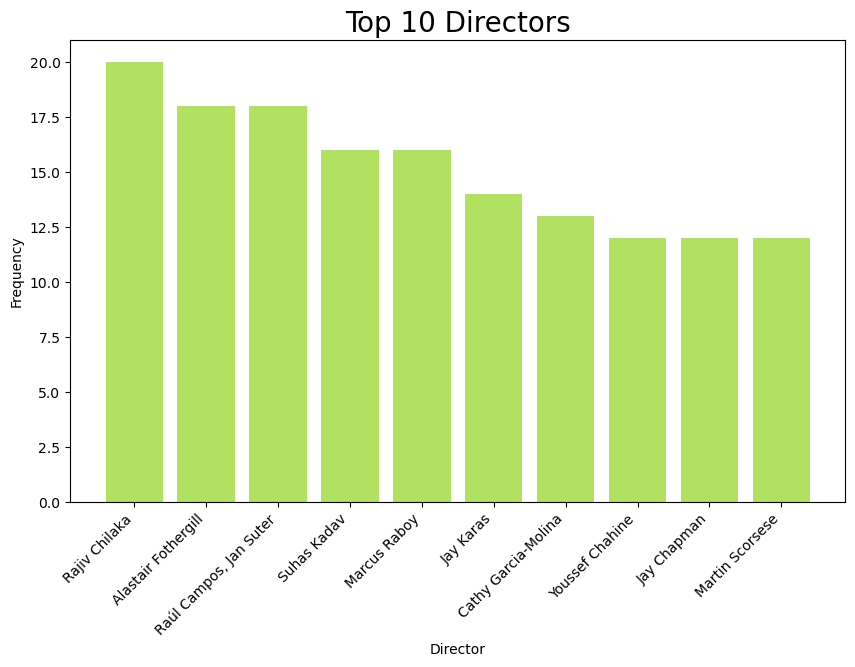

In [85]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Directors', fontsize = 20)

plt.bar(top_directors.index, top_directors.values, color = '#b2e061')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Director")
plt.ylabel("Frequency")

plt.show()

#### 9. Distribution of Movie Durations

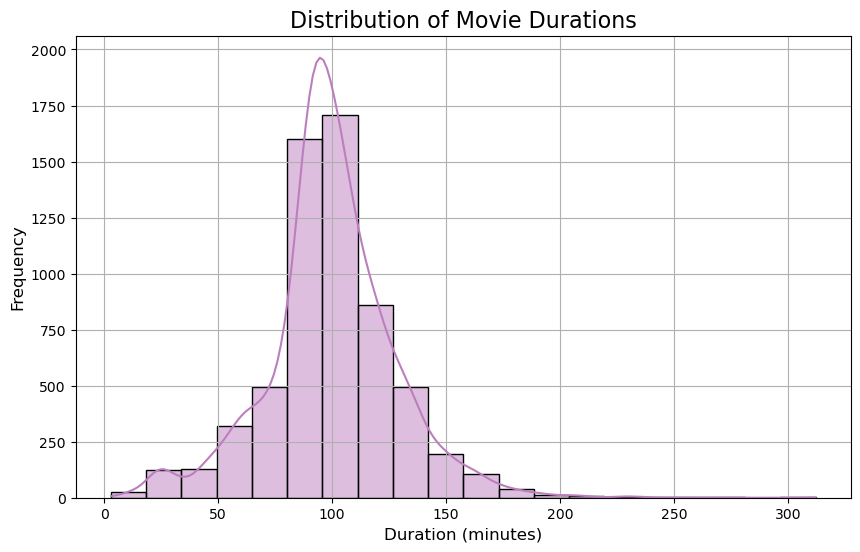

In [86]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Movie Durations', fontsize=16)

sns.histplot(movies['duration'], bins=20, kde=True, color='#bd7ebe')
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

#### 10. Number of TV Shows by Season Count

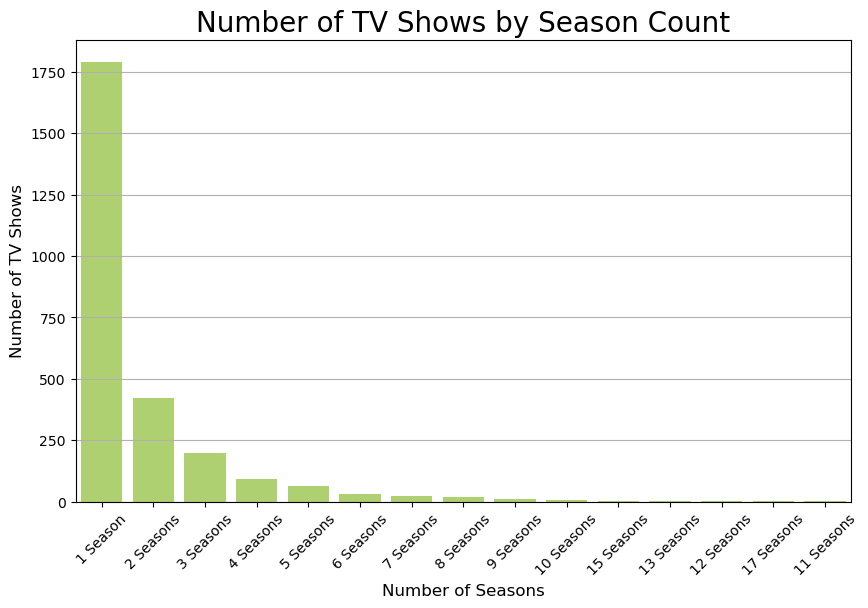

In [87]:
plt.figure(figsize=(10, 6))
plt.title('Number of TV Shows by Season Count', fontsize=20)

sns.barplot(x=season_counts.index, y=season_counts.values, color = "#b2e061")
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of TV Shows', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()